In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


('2017-08-23',)

2017-08-23
2016-08-23


<function matplotlib.pyplot.show(close=None, block=None)>

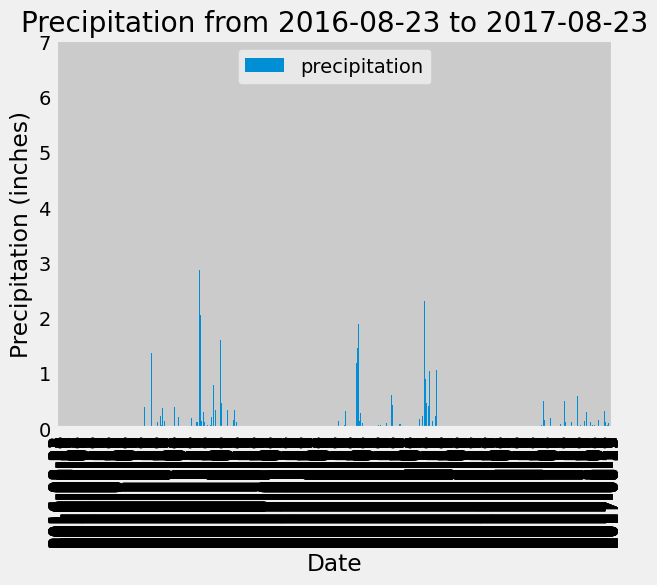

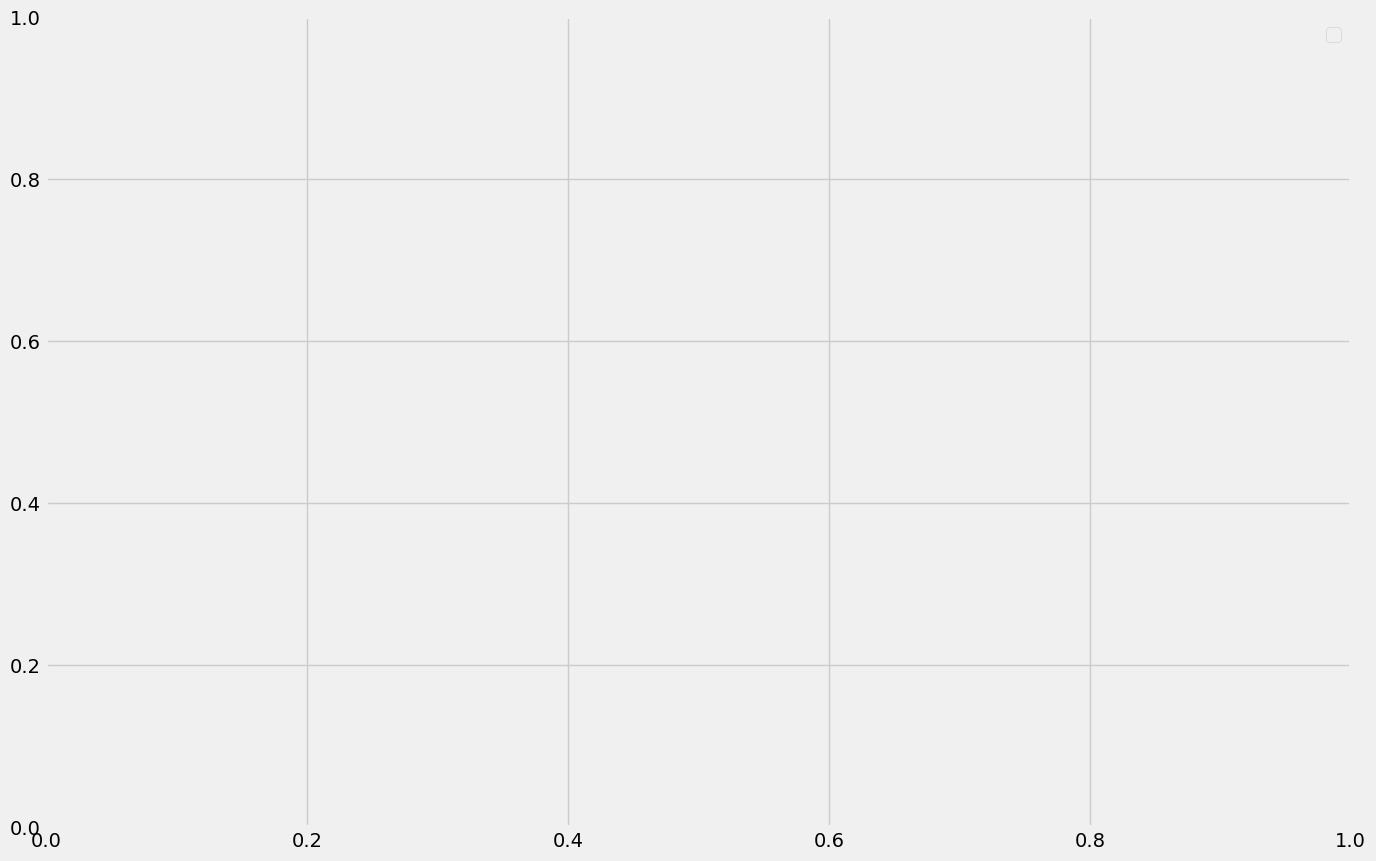

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = dt.date(2017,8,23)
print(most_recent_date)

# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

# # Perform a query to retrieve the data and precipitation scores
all_precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').all()

# # Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(all_precip, columns = ["date", "precipitation"])
one_year_df

# # Sort the dataframe by date
sorted_one_year_df = one_year_df.sort_values(by = ['date']) 
sorted_one_year_df

# # Use Pandas Plotting with Matplotlib to plot the data
sorted_one_year_df.plot(kind = 'bar', x = 'date', y = 'precipitation')
plt.title(f'Precipitation from {one_year_ago} to {most_recent_date}')
plt.ylabel("Precipitation (inches)")
plt.xlabel("Date")
xloc = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-04-18', '2017-05-31', '2017-07-10']
plt.xticks(rotation = 'vertical')
plt.figure(figsize=(15,10))
plt.legend("Precipitation")
plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()